# Riley ii

Picking up from the first notebook, let's start experimenting with ways to generate colour palletes.

First off, define the same function from the last notebook.

In [3]:
import shades
import random

In [4]:
def pick_two_colors(pallete: list, pallete_weights: list) -> list:
    """
    Pick two colors in line with weights given
    """
    if random.random() < 0.25:
        color = random.choices(pallete, weights=pallete_weights)[0]
        return [color, color]
    return random.choices(pallete, weights=pallete_weights, k=2)

## Generate evenly spaced around a colour wheel

We'll use HSV, define a start colour, and then move around the colour wheel equally to make a pallete

In [6]:
import colorsys

In [83]:
def make_even_pallete(starter_color, colors_in_pallete):
    starter_color = [i/255 for i in starter_color]
    starter_color = colorsys.rgb_to_hsv(*starter_color)
    # we'll keep the same saturation and value, and space out evenly the hue
    pallete = [
        (
            ((starter_color[0] + (i * 1/colors_in_pallete)) % 1),
            starter_color[1],
            starter_color[2],
        )
        for i in range(colors_in_pallete)]
    pallete = [colorsys.hsv_to_rgb(*i) for i in pallete]
    pallete = [tuple(int(i * 255) for i in color) for color in pallete]
    return pallete

In [67]:
[i for i in range(4)]

[0, 1, 2, 3]

In [62]:
def show_pallete(pallete: list) -> shades.Canvas:
    canvas = shades.Canvas(500, 500)
    for i, color in enumerate(pallete):
        width = int(canvas.width / len(pallete))
        xy = (int(width * i), 0)
        tone = shades.BlockColor(color)
        tone.rectangle(
            canvas,
            xy,
            width,
            canvas.height,
        )
    return canvas

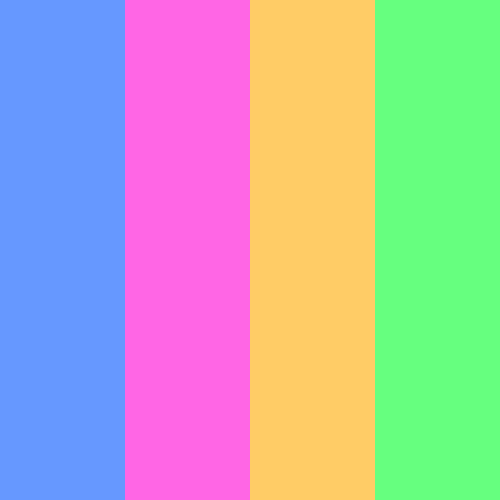

In [84]:
show_pallete(make_even_pallete((102, 153, 255), 4))

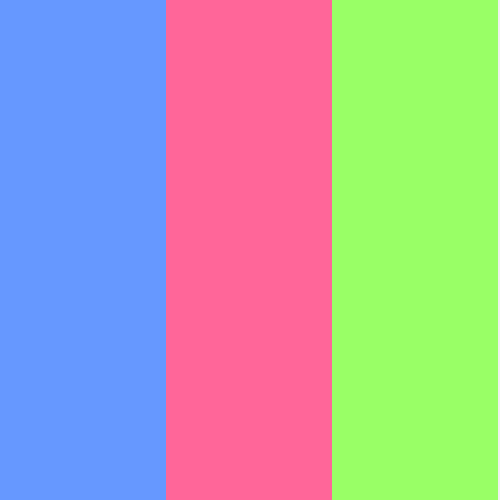

In [85]:
show_pallete(make_even_pallete((102, 153, 255), 3))

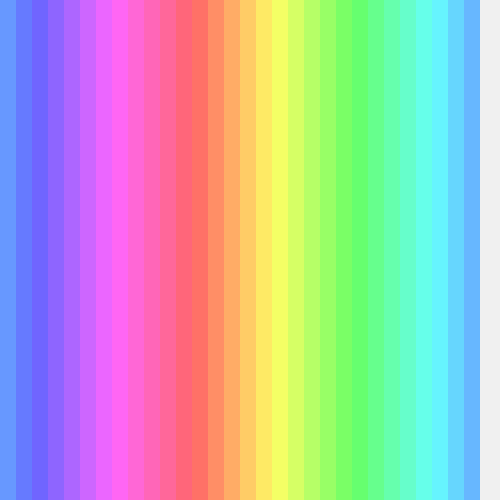

In [86]:
show_pallete(make_even_pallete((102, 153, 255), 30))

Ok, cool, I actually like that a lot as a method. Let's introduce some entopy to shift the colors a little and make things a bit less deterministic

In [102]:
def make_even_pallete(starter_color, colors_in_pallete, entropy=0):
    starter_color = [i/255 for i in starter_color]
    starter_color = colorsys.rgb_to_hsv(*starter_color)
    # we'll keep the same saturation and value, and space out evenly the hue
    pallete = [
        (
            ((starter_color[0] + (i * 1/colors_in_pallete)) % 1),
            starter_color[1],
            starter_color[2],
        )
        for i in range(colors_in_pallete)]
    pallete = [colorsys.hsv_to_rgb(*i) for i in pallete]
    pallete = [tuple(int((i + random.uniform(-entropy, entropy)) * 255) for i in color) for color in pallete]
    return pallete

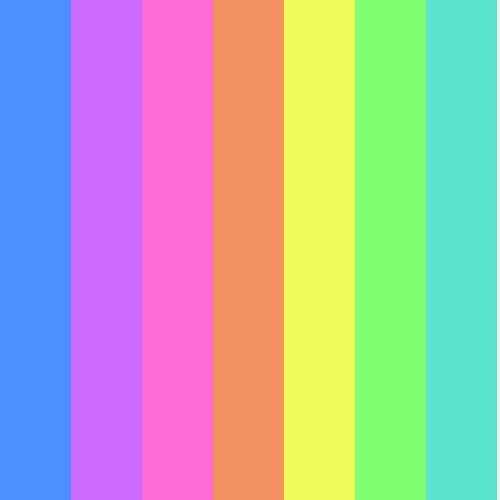

In [113]:
show_pallete(make_even_pallete((102, 153, 255), 7, 0.1))

That works for what I want. I think I'd like a few variations of colors as well though.

Lets duplicate the pallete then apply entropy n times.

In [114]:
def make_even_pallete(starter_color, colors_in_pallete, entropy=0, variations=1):
    starter_color = [i/255 for i in starter_color]
    starter_color = colorsys.rgb_to_hsv(*starter_color)
    # we'll keep the same saturation and value, and space out evenly the hue
    pallete = [
        (
            ((starter_color[0] + (i * 1/colors_in_pallete)) % 1),
            starter_color[1],
            starter_color[2],
        )
        for i in range(colors_in_pallete)]
    pallete = [colorsys.hsv_to_rgb(*i) for i in pallete]
    output_pallete = []
    for i in range(variations):
        output_pallete += [tuple(int((i + random.uniform(-entropy, entropy)) * 255) for i in color) for color in pallete]
    return output_pallete

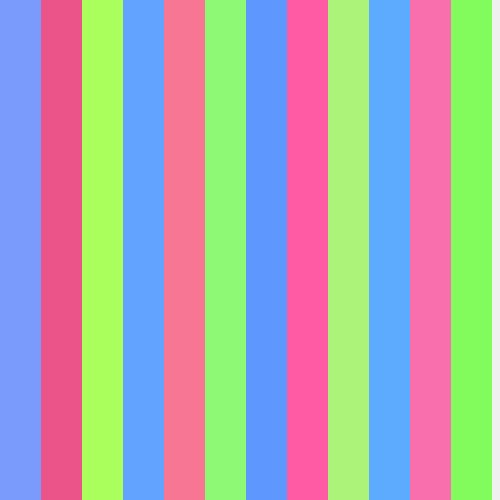

In [121]:
show_pallete(make_even_pallete((102, 153, 255), 3, 0.1, 4))

Now let's incorporate that into our riley algorithm

We'll use the initial selection of colours as our starter choices

In [196]:
def riley() -> shades.Canvas:
    pallete = make_even_pallete(
        (137, 207, 240),
        random.randint(2, 5),
        random.uniform(0, 0.12),
        random.randint(2, 4),
    )
    canvas = shades.Canvas(500, 800)
    ink = shades.BlockColor()

    pallete_weights = [random.random() for i in range(len(pallete))]

    grid_width = random.randint(5, 50)
    grid_offset = int(random.randint(5, 50)/random.choice([1, 2, 4]))
    grid_height = grid_offset * 2 # ensuring exact division
    block_size = 6

    for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
        for i, y in enumerate(range(-grid_height-grid_offset, canvas.height+grid_height+grid_offset, grid_height)):
            if (i + j) % block_size == 0:
                two_colors = pick_two_colors(pallete, pallete_weights)
            ink.color = two_colors[i % 2]
            ink.shape(
                canvas,
                [(x, y + grid_offset),
                (x + grid_width, y - grid_offset),
                (x + grid_width, y + grid_height - grid_offset),
                (x, y + grid_height + grid_offset)],
            )
        
    return canvas

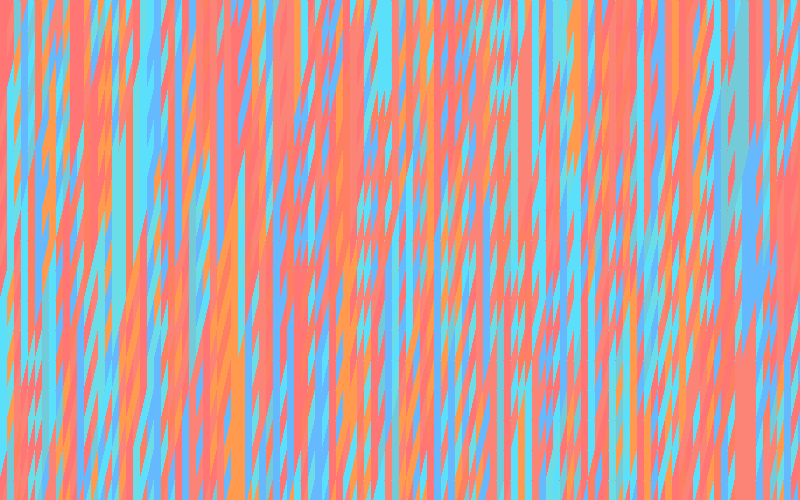

In [190]:
riley()

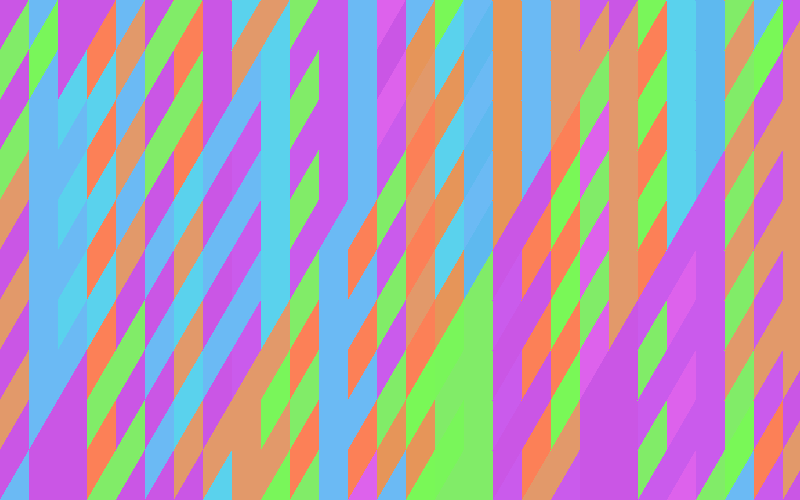

In [194]:
riley()

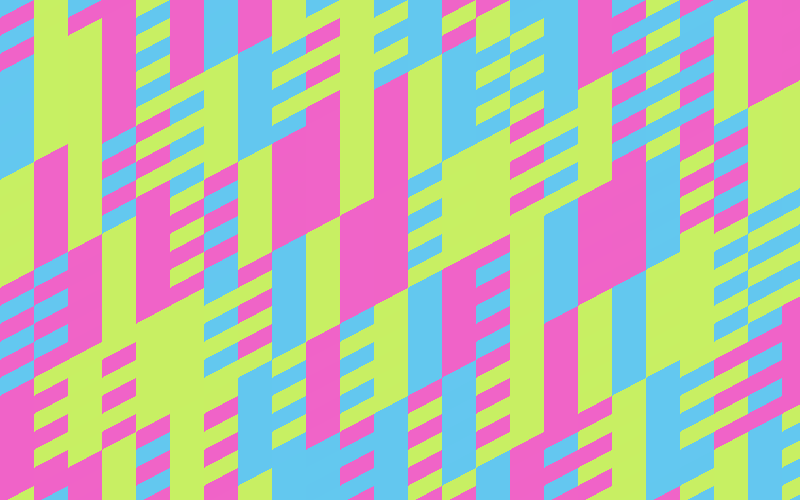

In [192]:
riley()

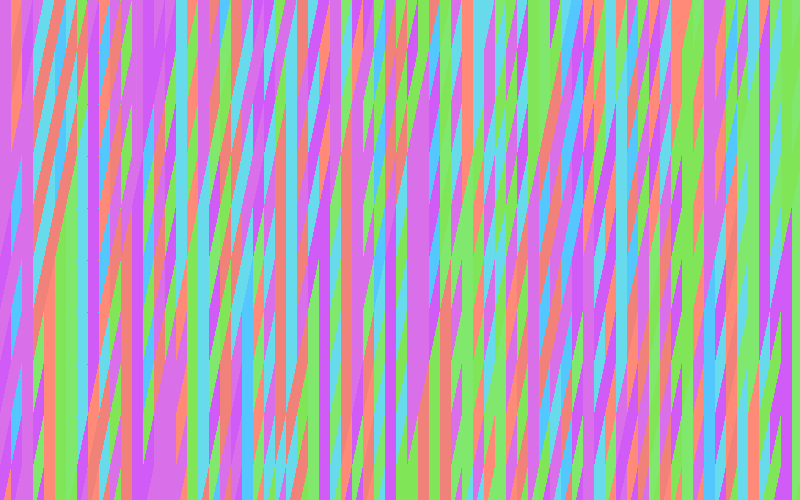

In [195]:
riley()

Ok, all these color combinations are literally horrible - let's take it back a notch